<a href="https://colab.research.google.com/github/sandeep92134/The-Data-Visualization-Workshop-by-packt/blob/master/module%204/Activity4.06%3A%20Visualizing%20the%20Impact%20of%20Education%20on%20Annual%20Salary%20and%20Weekly%20Working%20Hours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Activity 4.06: Visualizing the Impact of Education on Annual Salary and Weekly Working Hours
You're asked to get insights whether the education of people has an influence on the annual salary and weekly working hours. You ask 500 people in the state of New York about their age, annual salary, weekly working hours, and their education. You first want to know the percentage for each education type, therefore, use a tree map. Two violin plots shall be used to visualize the annual salary and the weekly working hours. Compare in each case to what extent the education has an impact.
It should also be taken into account that all visualizations in this activity are designed to be suitable for color blind people. In principle, this is always a good idea to bear in mind.

In [1]:
pip install squarify

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
sns.set()

Use pandas to read the dataset age_salary_hours.csv located in the Dataset folder. Use a colormap that is suitable for colorblind people.

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/sandeep92134/The-Data-Visualization-Workshop-by-packt/master/module%204/datasets/age_salary_hours.csv")

In [4]:
data.head()

,Age,Annual Salary,Weekly hours,Education
0,72,160000.0,40.0,Bachelor's degree or higher
1,72,100000.0,50.0,Bachelor's degree or higher
2,31,120000.0,40.0,Bachelor's degree or higher
3,28,45000.0,40.0,Bachelor's degree or higher
4,54,85000.0,40.0,Bachelor's degree or higher


Use a tree map to visualize the percentages for each education type.

In [5]:
# Compute percentages from dataset
degrees = set(data['Education'])
percentages = []
for degree in degrees:
    percentages.append(data[data['Education'] == degree].shape[0])
percentages = np.array(percentages)
percentages = ((percentages / percentages.sum()) * 100)

In [6]:
# Create labels for tree map
labels = [degree + '\n({0:.1f}%)'.format(percentage) for degree, percentage in zip(degrees, percentages)]

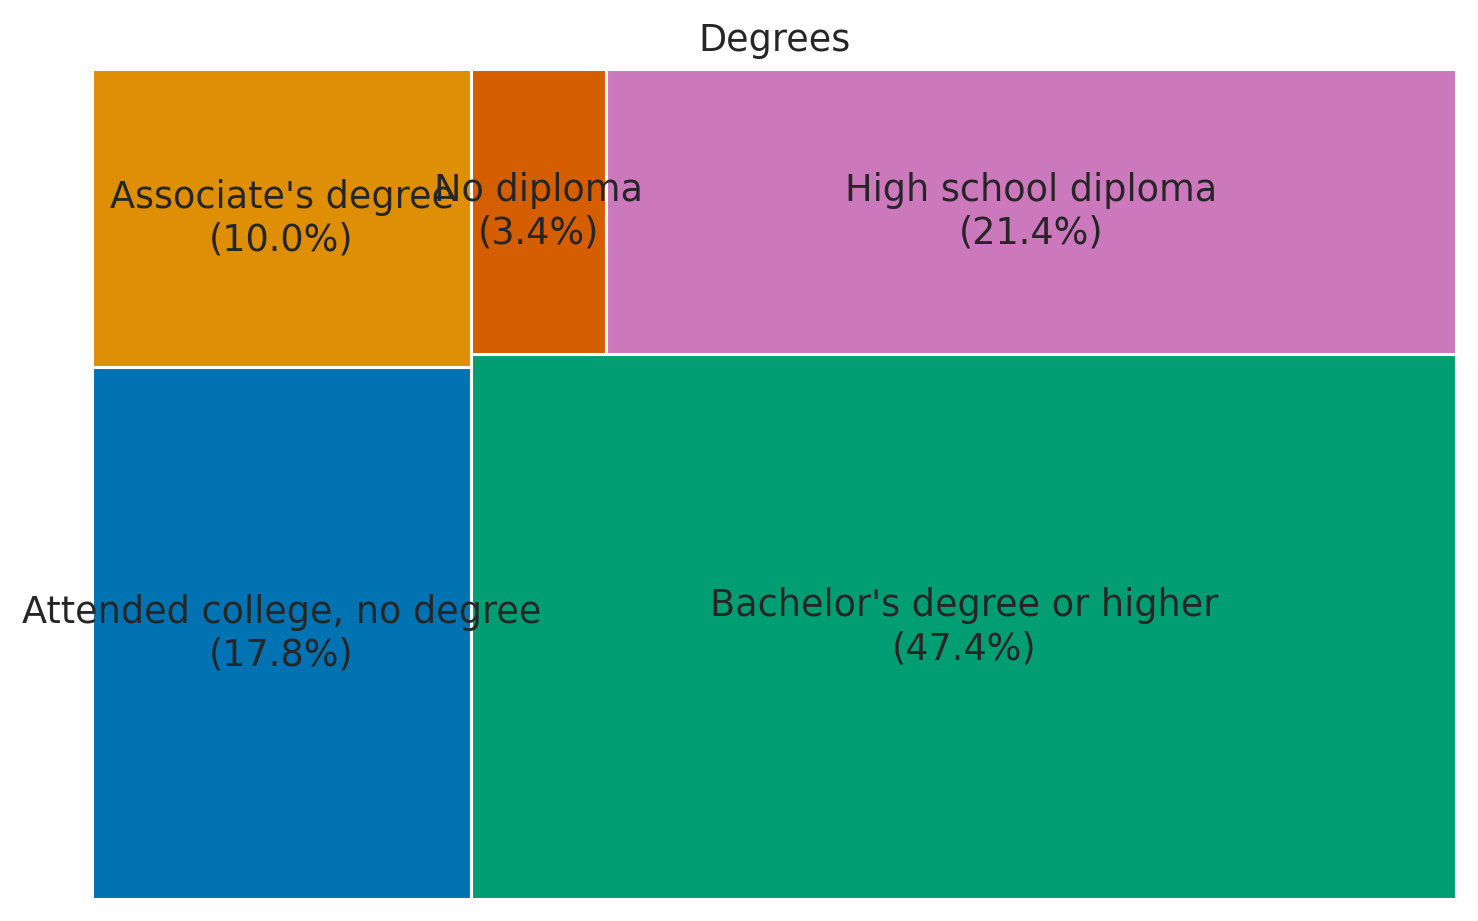

In [7]:
# Create figure
plt.figure(figsize=(8, 5), dpi=220)
squarify.plot(percentages, label=labels, color=sns.color_palette('colorblind', len(degrees)))
plt.axis('off')
# Add title
plt.title('Degrees')
# Show plot
plt.show()

Create a subplot with two rows to visualize two violin plots for the annual salary and weekly working hours, respectively. Compare in each case to what extent the education has an impact. To exclude pensioners, only consider people younger than 65. Use a colormap that is suitable for colorblind people. subplots() can be used in combination with Seaborn's plot, by simply passing the ax argument with the respective Axes.

In [8]:
ordered_degrees = sorted(list(degrees))
ordered_degrees = [ordered_degrees[4], ordered_degrees[3], ordered_degrees[1], ordered_degrees[0], ordered_degrees[2]]

In [9]:
data = data.loc[data['Age'] < 65]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


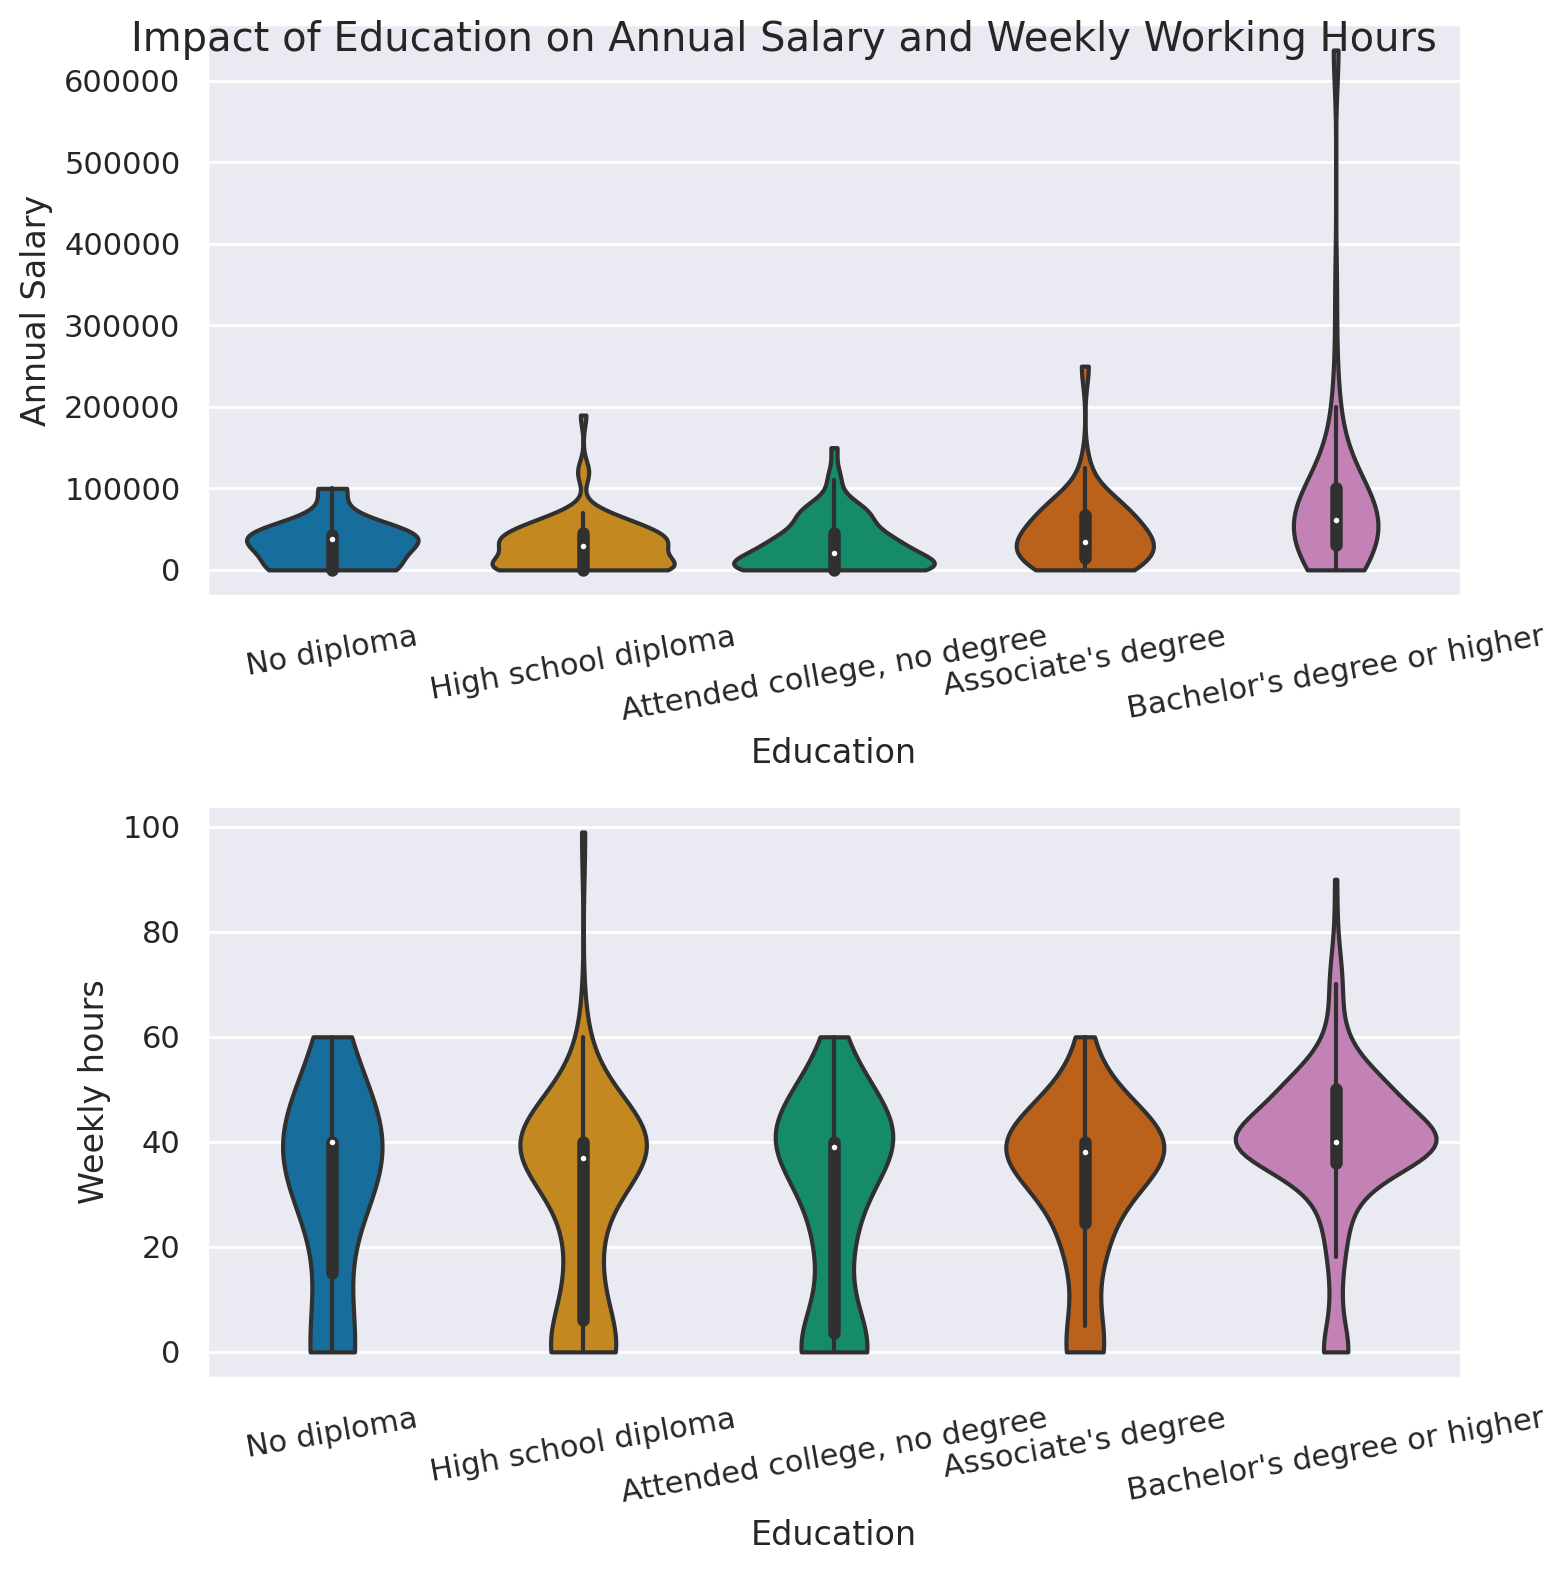

In [10]:
# Set color palette to colorblind
sns.set_palette('colorblind')
# Create subplot with two rows
fig, ax = plt.subplots(2, 1, dpi=200, figsize=(8, 8))
sns.violinplot('Education', 'Annual Salary', data=data, cut=0, order=ordered_degrees, ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=10)
sns.violinplot('Education', 'Weekly hours', data=data, cut=0, order=ordered_degrees, ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=10)
plt.tight_layout()
# Add title
fig.suptitle('Impact of Education on Annual Salary and Weekly Working Hours')
# Show figure
plt.show()